# Predicting heart disease using machine learning

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [56]:
# import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve

## Load Data

In [4]:
df = pd.read_csv("../data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

In [7]:
# Data exploration
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

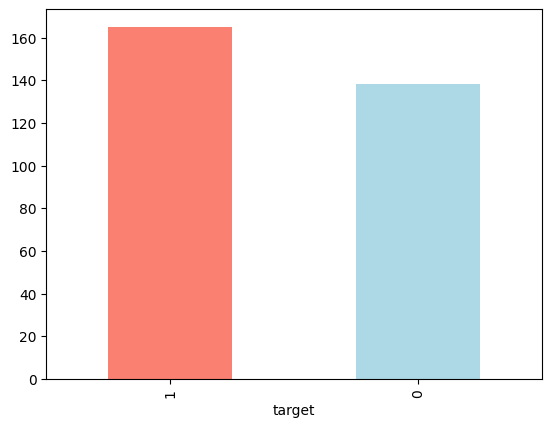

In [9]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency according to sex

In [13]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# compare target with sex
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


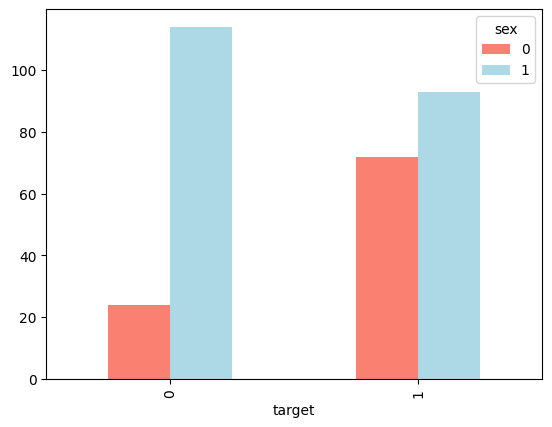

In [15]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["salmon", "lightblue"]);

In [16]:
df["thalach"].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

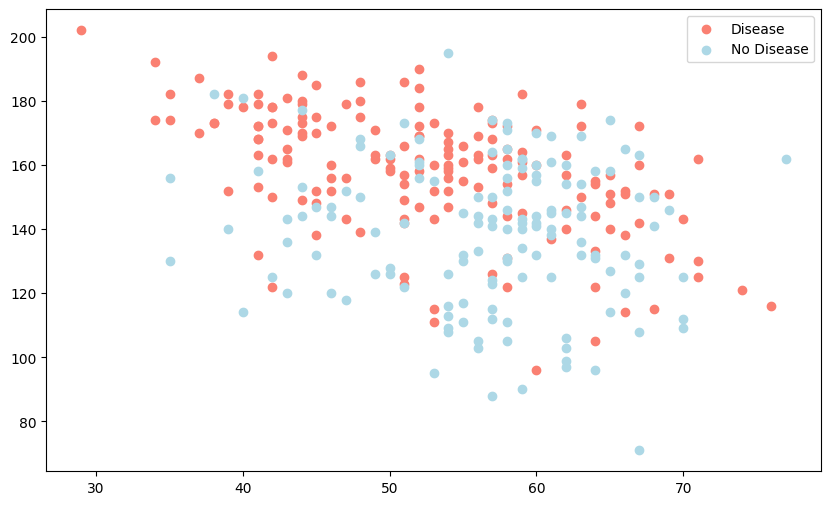

In [20]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df["age"][df["target"] == 1], df["thalach"][df["target"] == 1], c="salmon");

# scatter with negative examples
plt.scatter(df["age"][df["target"] == 0], df["thalach"][df["target"] == 0], c="lightblue");

plt.legend(["Disease", "No Disease"]);

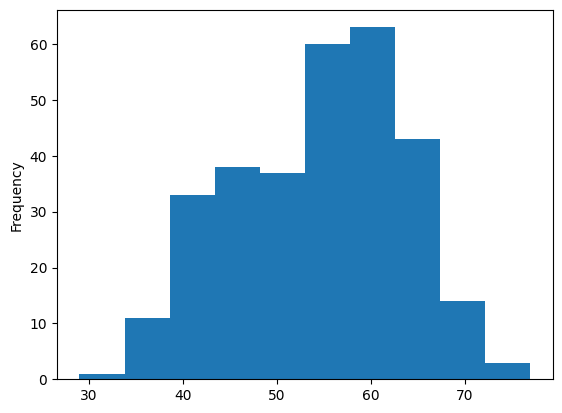

In [22]:
df["age"].plot.hist();

### Heart Disease Frequency per Chest pain type

In [23]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


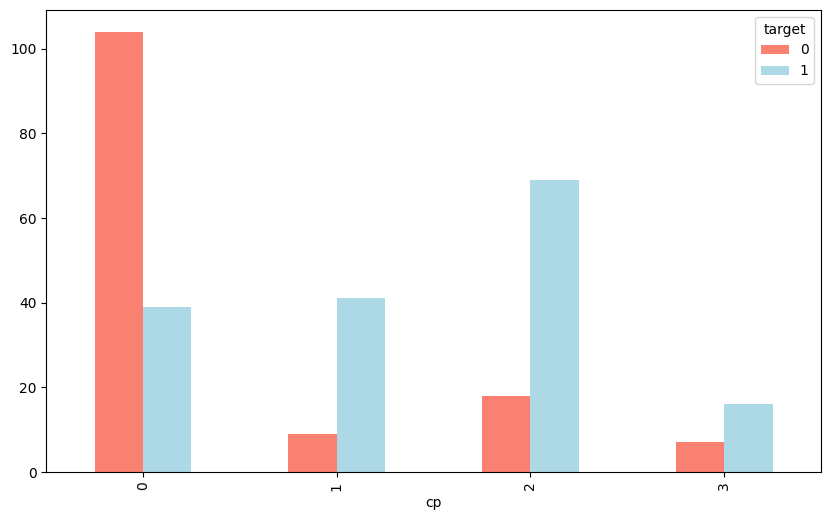

In [24]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

In [25]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


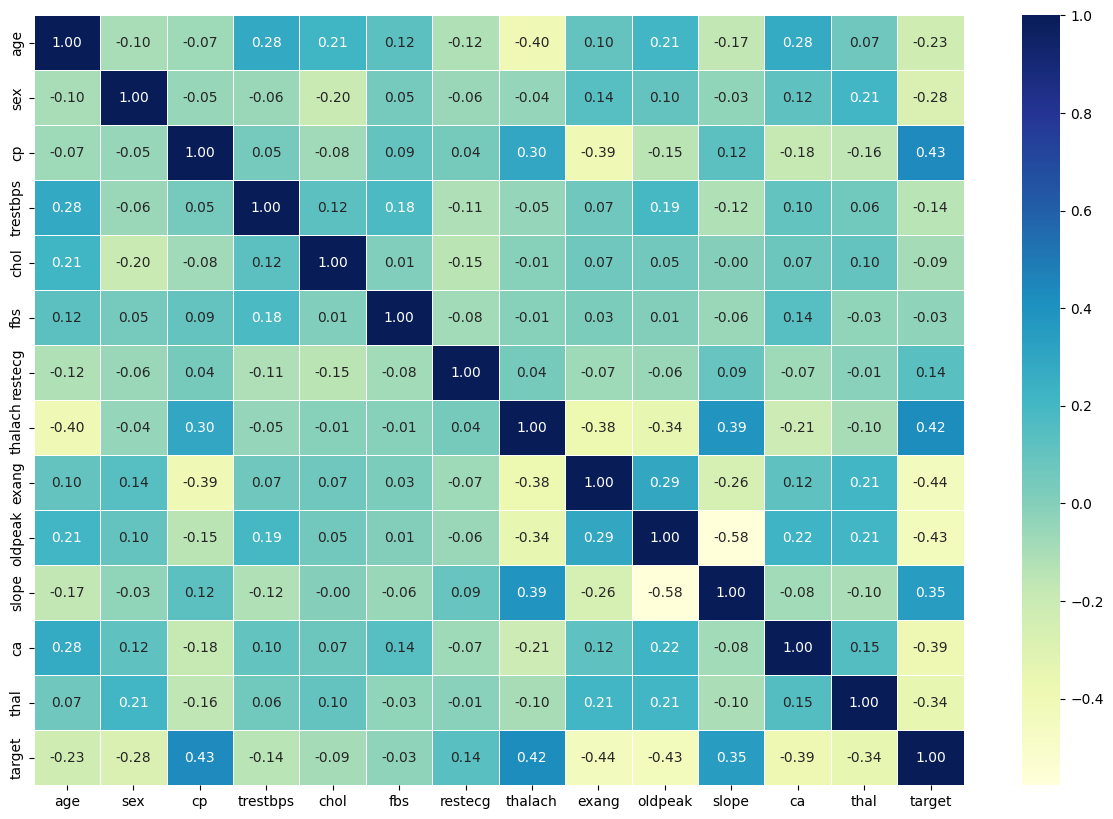

In [27]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

## Modeling

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [30]:
# split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dicttionary to keep model scores

    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

d:\Python\Machine_learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

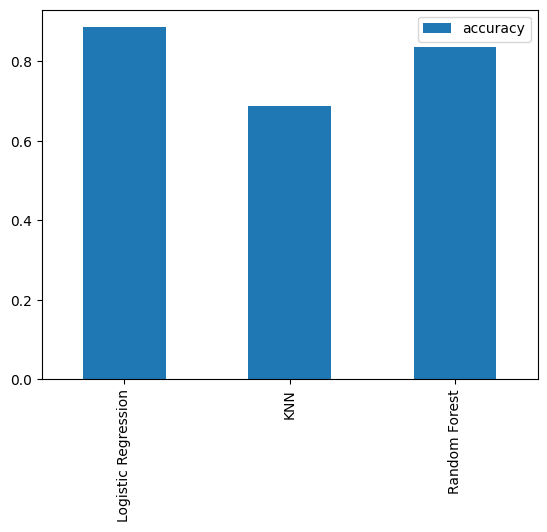

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

## Tuning/improving the model

### Hyperparameter tuning

In [36]:
# tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the algorithm
    knn.fit(X_train, y_train)

    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

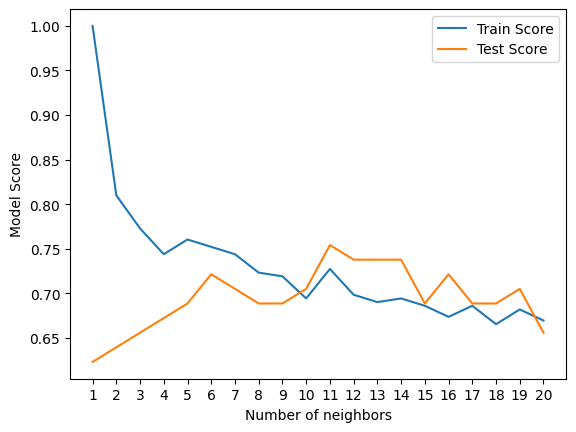

In [40]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

### Hyperparameter tuning with RandomizedSearchCV

In [45]:
# create a hyperparameter grid for logistic regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [42]:
# let's tune logistic regression model
np.random.seed(42)

# setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [44]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [46]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [48]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameters Tuning using GridSearchCV

In [49]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# setup grid hyperparameters search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
# check the best
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [51]:
# evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

In [52]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [53]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

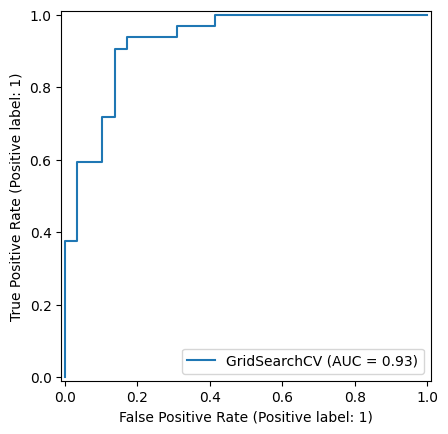

In [61]:
# plot ROC curve and calculate AUC metric
# fpr, tpr, thresholds = roc_curve(y_test, y_preds)
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [62]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

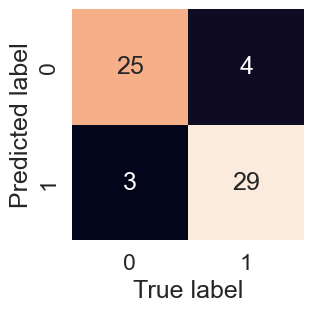

In [63]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [68]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [69]:
# create a new classifier with best parameters
clf = LogisticRegression(C=np.float64(0.20433597178569418), solver='liblinear')

In [78]:
# cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [79]:
# cross-validated precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

np.float64(0.8207936507936507)

In [80]:
# cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [81]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

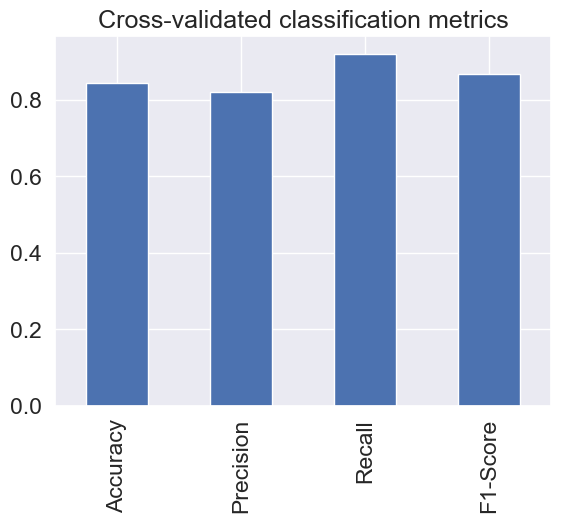

In [83]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_pre,
    "Recall": cv_recall,
    "F1-Score": cv_f1
}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature Importance

In [84]:
# fit an instance of logistic regression
clf = LogisticRegression(C=np.float64(0.20433597178569418), solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=np.float64(0.20433597178569418), solver='liblinear')

In [85]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [86]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672775125744686),
 'sex': np.float64(-0.8604462617531493),
 'cp': np.float64(0.6606705112737149),
 'trestbps': np.float64(-0.011569930915493508),
 'chol': np.float64(-0.0016637441846093658),
 'fbs': np.float64(0.04386114942757081),
 'restecg': np.float64(0.3127582620910283),
 'thalach': np.float64(0.02459361246994142),
 'exang': np.float64(-0.6041306524707951),
 'oldpeak': np.float64(-0.568628196677622),
 'slope': np.float64(0.4505162332451247),
 'ca': np.float64(-0.636098853689775),
 'thal': np.float64(-0.6766337271477075)}

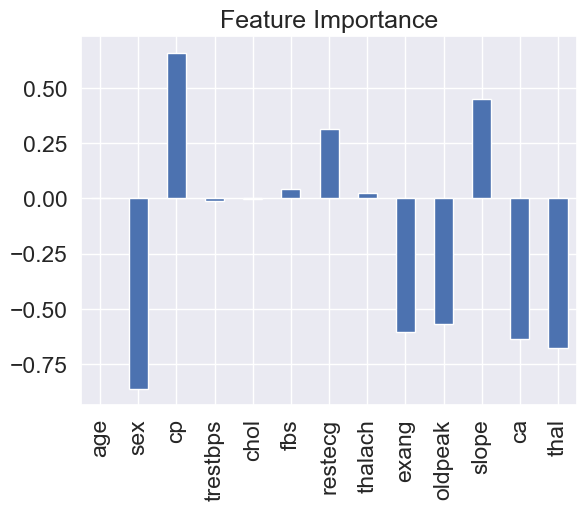

In [87]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [88]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93
